### Arxiv HEP-TH (high energy physics theory) citation graph is from arXiv and covers all the citations. Edges from u to v indicate that a paper u cited another paper v. If a paper cites, or is cited by, a paper outside the dataset, the graph does not contain any information about this. The data is of the papers in the period from January 1993 to April 2003.

## Identificare il dataset di partenza

Il grafo che abbiamo identificato è un grafo diretto, quindi con i nodi che hanno precise direzioni, dimostrando quale paper ne cita un altro. 
##### Nodi: 
I nodi rappresentano i paper accademici in ambito di fisica, ricavati da arXiv. Sono dunque <b> individui. </b>
##### Connessioni:
Citazione di un paper u all'interno di un paper v. Sono dunque <b> relazioni. </b>

In [5]:
# interactive plots in Jupyter, used to show plots inline in the notebook
%matplotlib inline

# The networkx library
import networkx as nx

# Numpy for enhanced math array management
import numpy as np

# statistical tools (we only use ECDF)
from statsmodels.distributions.empirical_distribution import ECDF

# Mathematical plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# use to control whether to show the entire cell output or only the last_expr (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to generate random numbers
from random import *

# to fit power law distributions
from powerlaw import *

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
input_file = 'cit-HepTh.edges'
output_file = 'cit-HepTh_2.edges'
 
with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        columns = line.split()
        if len(columns) > 2:
            del columns[2]
        outfile.write(' '.join(columns) + '\n')

In [3]:
def read_custom_edgelist(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 2:
                u, v = parts[:2]
                G.add_edge(u, v)
    return G

G_u = read_custom_edgelist('cit-HepTh_2.edges')

In [4]:
G = G_u.to_directed()

## Analizzare la struttura della rete
Utilizzare le misure di rete introdotte nella prima parte del corso (distribuzione del
grado, densità, clustering coefficient, centralità, assortatività…) per caratterizzare il
dataset selezionato.

In [7]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 22910
Number of edges: 4889598


## The Giant Component

In [6]:
# weakly connected components means that it is sufficient that nodes are connected via a unidirected path
# strongly connected components means that nodes must be mutually connected via two unidirected paths
G_cc = list(nx.weakly_connected_components(G))
G_GC = nx.subgraph(G, max(G_cc, key=len))
print(G_GC)

G_cc_s = list(nx.strongly_connected_components(G))
G_GC_s = nx.subgraph(G, max(G_cc_s, key=len))
print(G_GC_s)

# number of clusters
#len(G_cc)
wc = nx.number_weakly_connected_components(G)
sc = nx.number_strongly_connected_components(G)
wc, sc

DiGraph with 22721 nodes and 4889284 edges
DiGraph with 22721 nodes and 4889284 edges


(75, 75)

La componente debolmente connessa e la componente fortemente connessa hanno lo stesso numero di nodi e archi, questo vuol dire che la componente stessa è un grafo fortemente connesso. Questo significa che ogni nodo nella componente è raggiungibile da ogni altro nodo seguendo la direzione degli archi.

## Induced subgraph

In [51]:
# Select only nodes with degree > 5000 from the FB Giant Component
vs = [n for n in list(G_GC.nodes) if G_GC.degree(n) > 5000]

# "Induced" subgraph: graph composed by
# - a set of vertices (from the original graph)
# - only the edges connecting those vertices (in the original subgraph)
G_sub = G_GC.subgraph(vs)
print(G_sub)

DiGraph with 75 nodes and 5486 edges


## Plottare il grafo

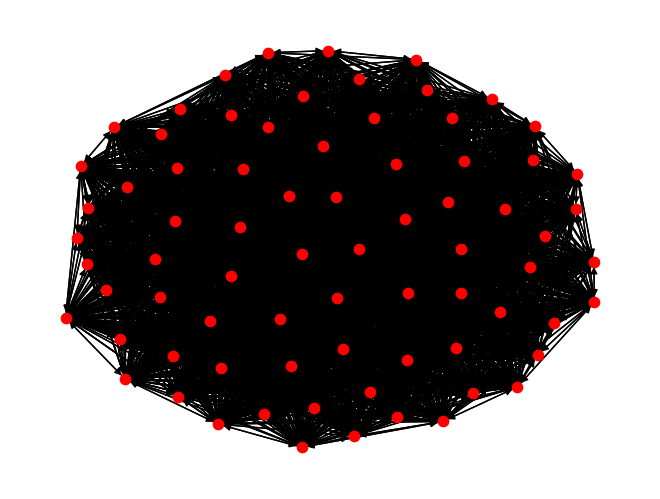

In [29]:
# Example with the induced graph with nodes having degree > 5000
try:
    del visual_style
    visual_style = {}
except NameError:
    visual_style = {}
    
# visual_style["bbox"] = (600,600)
visual_style["with_labels"] = False
visual_style["node_size"] = 55 #default 300
visual_style["node_color"] = 'red'
visual_style["node_shape"] = 'o'
visual_style["arrowsize"] = 10 # 10 default
visual_style["pos"] = nx.spring_layout(G_sub, seed = 20) # the spring layout is the default one used by draw

nx.draw(G_sub, **visual_style)

## Analisi del grado

In [33]:
list(G_sub.degree())

[('425', 148),
 ('302', 148),
 ('72', 148),
 ('246', 148),
 ('443', 148),
 ('1820', 148),
 ('270', 148),
 ('764', 148),
 ('510', 148),
 ('1282', 148),
 ('749', 146),
 ('27', 146),
 ('335', 148),
 ('316', 146),
 ('555', 148),
 ('15', 142),
 ('53', 148),
 ('305', 148),
 ('209', 146),
 ('289', 146),
 ('737', 138),
 ('736', 144),
 ('157', 148),
 ('320', 144),
 ('304', 146),
 ('1025', 134),
 ('155', 148),
 ('21', 144),
 ('255', 148),
 ('347', 144),
 ('483', 148),
 ('565', 138),
 ('1195', 148),
 ('317', 146),
 ('610', 148),
 ('8', 148),
 ('35', 148),
 ('559', 148),
 ('2804', 148),
 ('10', 148),
 ('718', 148),
 ('1178', 146),
 ('938', 140),
 ('258', 148),
 ('810', 148),
 ('130', 146),
 ('589', 148),
 ('1542', 146),
 ('1217', 146),
 ('469', 148),
 ('738', 138),
 ('1600', 148),
 ('5', 148),
 ('1132', 144),
 ('697', 142),
 ('747', 148),
 ('771', 148),
 ('166', 148),
 ('89', 142),
 ('6141', 148),
 ('607', 144),
 ('247', 148),
 ('152', 148),
 ('261', 146),
 ('222', 148),
 ('717', 148),
 ('7', 148)

In [41]:
ind = G_sub.in_degree()
ind

InDegreeView({'425': 74, '302': 74, '72': 74, '246': 74, '443': 74, '1820': 74, '270': 74, '764': 74, '510': 74, '1282': 74, '749': 73, '27': 73, '335': 74, '316': 73, '555': 74, '15': 71, '53': 74, '305': 74, '209': 73, '289': 73, '737': 69, '736': 72, '157': 74, '320': 72, '304': 73, '1025': 67, '155': 74, '21': 72, '255': 74, '347': 72, '483': 74, '565': 69, '1195': 74, '317': 73, '610': 74, '8': 74, '35': 74, '559': 74, '2804': 74, '10': 74, '718': 74, '1178': 73, '938': 70, '258': 74, '810': 74, '130': 73, '589': 74, '1542': 73, '1217': 73, '469': 74, '738': 69, '1600': 74, '5': 74, '1132': 72, '697': 71, '747': 74, '771': 74, '166': 74, '89': 71, '6141': 74, '607': 72, '247': 74, '152': 74, '261': 73, '222': 74, '717': 74, '7': 74, '230': 74, '1211': 73, '509': 74, '30': 74, '11': 72, '250': 74, '522': 72, '268': 74})

In [42]:
od = G_sub.out_degree()
od

OutDegreeView({'425': 74, '302': 74, '72': 74, '246': 74, '443': 74, '1820': 74, '270': 74, '764': 74, '510': 74, '1282': 74, '749': 73, '27': 73, '335': 74, '316': 73, '555': 74, '15': 71, '53': 74, '305': 74, '209': 73, '289': 73, '737': 69, '736': 72, '157': 74, '320': 72, '304': 73, '1025': 67, '155': 74, '21': 72, '255': 74, '347': 72, '483': 74, '565': 69, '1195': 74, '317': 73, '610': 74, '8': 74, '35': 74, '559': 74, '2804': 74, '10': 74, '718': 74, '1178': 73, '938': 70, '258': 74, '810': 74, '130': 73, '589': 74, '1542': 73, '1217': 73, '469': 74, '738': 69, '1600': 74, '5': 74, '1132': 72, '697': 71, '747': 74, '771': 74, '166': 74, '89': 71, '6141': 74, '607': 72, '247': 74, '152': 74, '261': 73, '222': 74, '717': 74, '7': 74, '230': 74, '1211': 73, '509': 74, '30': 74, '11': 72, '250': 74, '522': 72, '268': 74})

In [45]:
ind == od

True

Cerchiamo di capire qual è il grado massimo della nostra rete e il nodo che ha quel grado massimo

In [48]:
G_deg = list(G_GC.degree())

# # the maximum degree, and the ID of the node with maximum degree
id_max, dmax = max(G_deg, key=lambda x: x[1])

id_max, dmax

('559', 17436)

In [49]:
# list of node degrees, sorted
sorted(G_deg, key=lambda x: x[1], reverse=True)[0:4]

[('559', 17436), ('718', 14788), ('717', 14280), ('250', 14066)]

## Distribuzione del grado

Plottiamo la distribuzione del grado

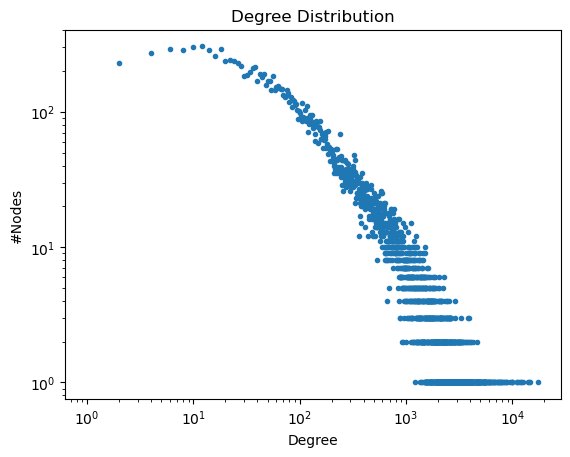

In [18]:
hist = nx.degree_histogram(G_GC) # return a list of frequencies of degrees. The degree values are the index in the list.

_ = plt.plot(range(0, len(hist)), hist, ".")
_ = plt.title("Degree Distribution")
_ = plt.xlabel("Degree")
_ = plt.ylabel("#Nodes")
_ = plt.loglog()

Un altro modo per farlo è quello di utilizzare la funzione hist di matplotlib

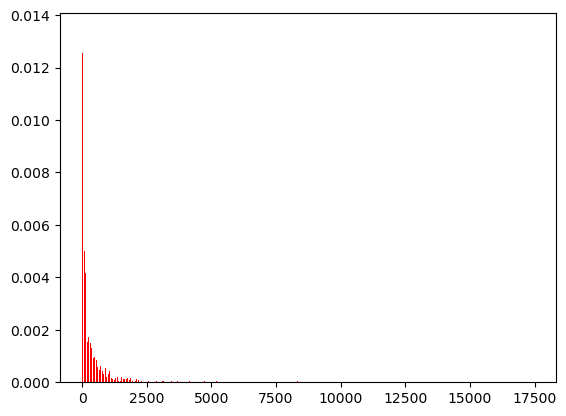

In [19]:
G_deg_list = list(dict(G_GC.degree()).values()) # degree() returns a "DiDegreeView", which we can convert to what we want. the list conversion is needed because values() returns "dict_values"
dd_h, dd_h_bins, _ = plt.hist(G_deg_list, bins=range(1,max(G_deg_list)+2), density=True, color = 'red')

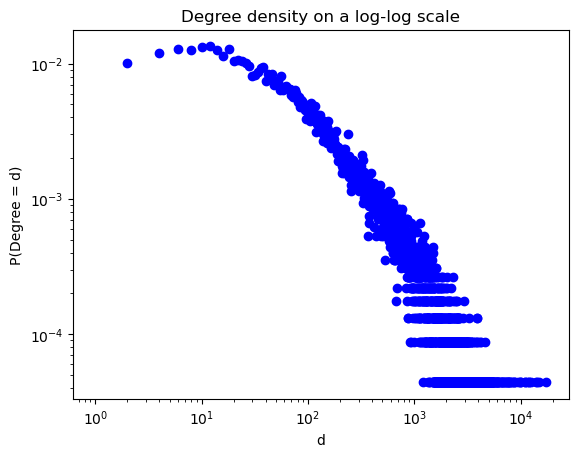

In [67]:
# Degree density on a loglog scale
_ = plt.loglog(dd_h_bins[:-1], dd_h, 'bo') # with [:-1] we drop the last element: because bins are [1,2),[2,3), so we want to drop the last end point
_ = plt.xlabel("d")
_ = plt.ylabel("P(Degree = d)")
_ = plt.title("Degree density on a log-log scale")

Ora passiamo dalla densità alla CCDF. Quando dobbiamo plottare i gradi spesso non conviene plottare gli istogrammi perchè si tende a vedere i plateu in corrispondenza di valori alti di grado. Un modo per togliere questi plateau è visualizzare i dati tramite la CCDF.
La CCDF ci da la probabilità che la variabile aleaotoria che descrive l'andamento dei gradi prenda un valore maggiore di d (specifico valore). Ovviamente parte da 1, perchè la prob che il grado sia maggiore di 0 è 1, tutti i gradi per def sono maggiori di 0, ma tende a ridursi sempre di più perchè la prob che il grado di un nodo sia maggiore di 80 è bassa. 

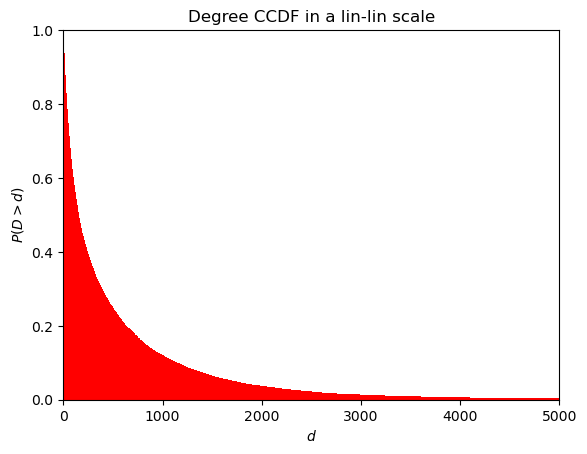

In [76]:
# Compute the CCDF - we can use 2 ways
# 1. use the histogram functions with parameter cumulative=-1 gives the CCDF
dd_h, dd_h_bins, _ = plt.hist(G_deg_list, bins=range(1,max(G_deg_list)+2), density = True, color = 'red', cumulative = -1)
_ = plt.axis([0,5000,0,1])
_ = plt.xlabel("$d$")
_ = plt.ylabel("$P(D>d)$")
_ = plt.title("Degree CCDF in a lin-lin scale")

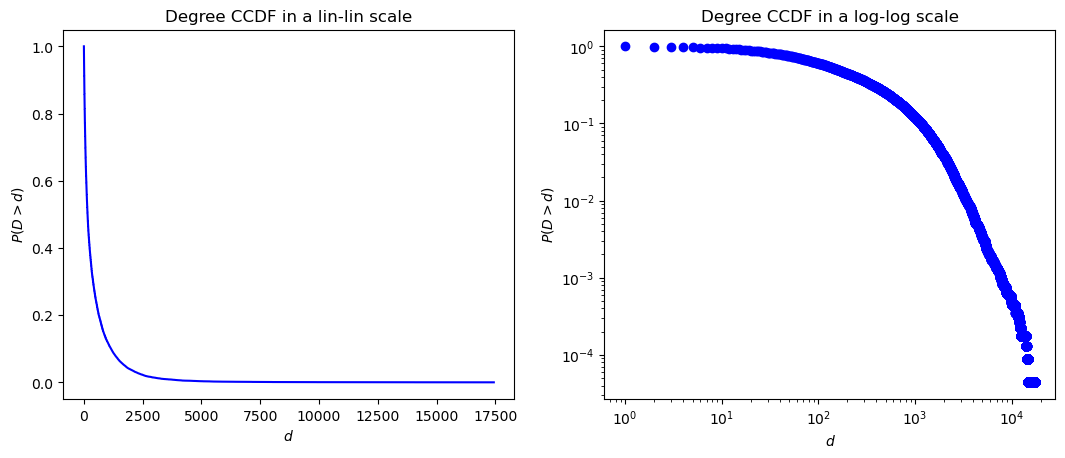

In [20]:
# 2. More general: use the ECDF function of statsmodels.distributions.empirical_distribution
# ECDF(dataset) returns a the empirical CDF computed from the dataset, which can be used as a FUNCTION
# - i.e., it is possible to call ECDF(x) for any x, irrespective of the set of data from which the ECDF is derived
deg_cdf = ECDF(G_deg_list)

# scale the fig size twice in length
default_sizes = plt.rcParams["figure.figsize"] # rc stands for runtime configuration
fig_sizes = (2*default_sizes[0], default_sizes[1])

# generate a figure with 2 subplots, organised in 1 row and 2 columns
# ax1 and ax2 ("axes") are used to access the individual plots
# NB: in case of more rows, axes must be specified as list of lists, e.g., for 2x2 ((ax1,ax2),(ax3,ax4))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = fig_sizes)

# plot the CCDF in lin-lin and log-log scales
# see http://matplotlib.org/api/axes_api.html for the API of the Axis class
# see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot or the Axes.plot() documentation
# for the parameters of the plot method
degs = np.arange(1,max(G_deg_list)+1)

_ = ax1.plot(degs, 1-deg_cdf(degs), 'b-')
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("$P(D>d)$")
_ = ax1.set_title("Degree CCDF in a lin-lin scale")

_ = ax2.loglog(degs, 1-deg_cdf(degs), 'bo')
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("$P(D>d)$")
_ = ax2.set_title("Degree CCDF in a log-log scale")

## Part 5. Fitting the degree distribution

## Power Laws

![image.png](attachment:image.png)

Confrontiamo la nostra rete con distribuzioni analitiche

Calculating best minimal value for power law fit


PL exponents: (xmin=10) 1.42; (auto xmin=1106.00) 3.66


<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

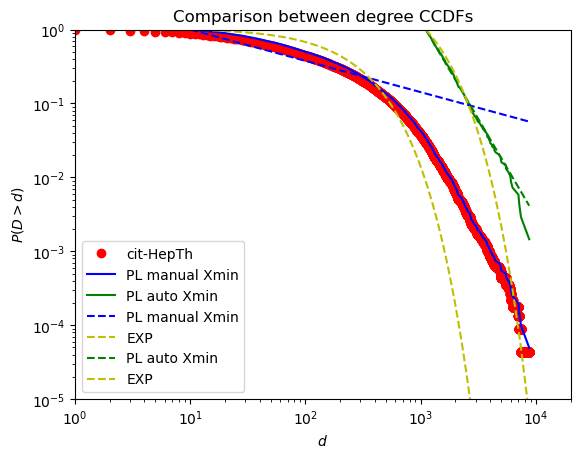

In [88]:
# First, we find the best power law fit for the degree distribution
# with a fixed minimum value xmin (minimum degree for which the fitting is computed)
# - see the plot of the CCDFs for understanding how fitting depends on xmin
G_GC_u = G_GC.to_undirected()
d_G = list(dict(G_GC_u.degree()).values())
G_ecdf = ECDF(d_G)

xmin = 10
fit_pl = Fit(d_G, xmin = xmin)
# by computing automatically the "best" xmin value
fit_pl_auto = Fit(d_G)

exp_pl_auto = fit_pl_auto.alpha
xmin_auto = fit_pl_auto.xmin
exp_pl = fit_pl.alpha
print ("PL exponents: (xmin=%d) %.2f; (auto xmin=%.2f) %.2f" % (xmin, exp_pl, xmin_auto, exp_pl_auto))

def ccdf_pl(data, xmin, exp):
    res = [1] * len(data)
    for i in range(len(data)):
        if data[i] > xmin:
            res[i] = (data[i]/xmin)**(-(exp-1))
    return res

x = np.arange(1,max(d_G)+1)
x_cut = np.arange(xmin,max(d_G)+1)
G_ecdf_cut = ECDF([x for x in d_G if x > xmin])
_ = plt.loglog(x, 1-G_ecdf(x), 'ro', label = 'cit-HepTh')
# _ = plt.loglog(x_cut, 1-fb_ecdf_cut(x_cut), 'ro', label = 'Facebook - after xmin')
# _ = plt.loglog(x, ccdf_pl(x, xmin, exp_pl), 'b-', label = 'PL manual Xmin')
# _ = plt.loglog(x, ccdf_pl(x, xmin_auto, exp_pl_auto), 'g-', label = 'PL auto Xmin')
fig1 = fit_pl.plot_ccdf(color="b",  label = 'PL manual Xmin')
fit_pl_auto.plot_ccdf(color="g",  label = 'PL auto Xmin', ax=fig1)
fit_pl.power_law.plot_ccdf(color="b",  label = 'PL manual Xmin', ax=fig1, linestyle='dashed')
fit_pl.exponential.plot_ccdf(color='y', label = 'EXP', ax=fig1, linestyle='dashed')
fit_pl_auto.power_law.plot_ccdf(color='g', label = 'PL auto Xmin', ax=fig1, linestyle='dashed')
fit_pl_auto.exponential.plot_ccdf(color='y', label = 'EXP', ax=fig1, linestyle='dashed')
_ = plt.xlim(1,20000)
_ = plt.ylim(0.00001, 1)
_ = plt.xlabel("$d$")
_ = plt.ylabel("$P(D>d)$")
_ = plt.title("Comparison between degree CCDFs")
_ = plt.legend(numpoints = 1)

A colpo d occhio abbiamo capito che questo grafo potrebbe avere una tendenza power law, quindi una tendenza di tail, comunque non pura. All inizio c'è un pò di sporco nel comportamento del degree. Vediamo due casi, uno in cui mettiamo un valore a caso a xmin, quindi calcoliamo la probabilità a partire da xmin, iniziamo a fittare la pareto da qui, e uno in cui è il software che ci fa la stima. Il software stima anche l'esponente della power law alfa. Con i valori stimati il fitting è pessimo per la parte blu. La nostra distribuzione sembra essere più un esponenziale che una pareto. Se invece ci restringiamo nella zona in cui ha deciso di tagliare l'algortimo, che è per xmin maggiore di 2000 più o meno, la pareto e la curva empirica sono molto vicine però è vicinissima anche l'esponenziale, perchè siamo con alfa sopra 3. Sopra 3 tra le code pesanti e le code leggere tanta differenza non si vede. 

In [87]:
# R is the loglikelihood ratio between the two candidate distributions. This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second distribution. 
# The significance value for that direction is p (the smaller the better. Statistical reliability for p < 0.01)

R,p = fit_pl_auto.distribution_compare('power_law', 'exponential')
R,p

R,p = fit_pl.distribution_compare('power_law', 'exponential')
R,p

(31.418608369321888, 0.0041667770363020985)

(-2971.028953287826, 4.112825888745143e-48)

## Assortativity

-0.03398038381313383

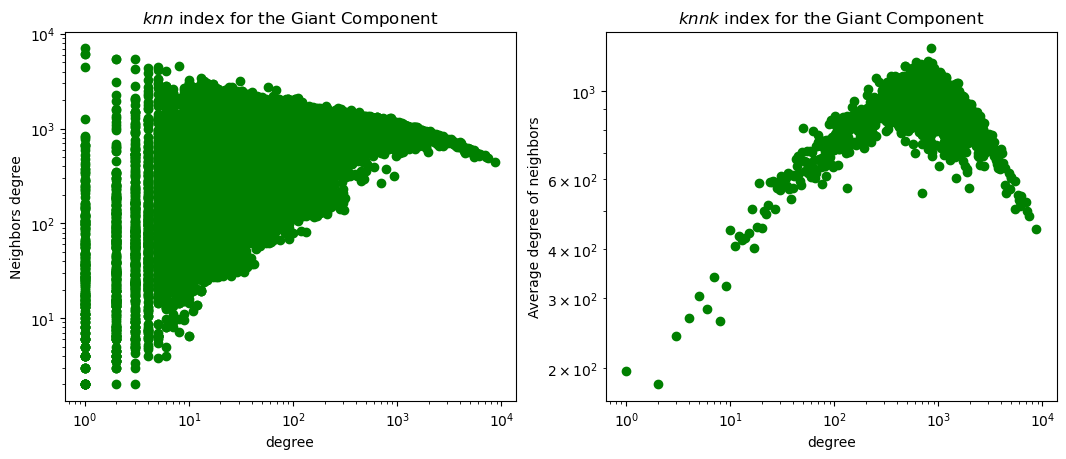

In [91]:
# The global assortativity coefficient (Pearson correlation) - we will need the undirected version of the graph from now on
nx.degree_assortativity_coefficient(G_GC_u)

# The knn analysis 

# average nearest neighbor degree for all vertices (knn)
G_knn = nx.average_neighbor_degree(G_GC_u) #dict # node: avg degree of its neigh
# G_knn

# average nearest neighbor degree of vertices with same degree value
G_knnk = nx.average_degree_connectivity(G_GC_u) #dict # degree: avg degree of neighs for nodes with that degree
G_knnk = dict(sorted(G_knnk.items())) # not needed for plotting, just to get a nicer print
# fb_knnk

deg_list=[x[1] for x in list(G_GC_u.degree())]

_ = fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (2*default_sizes[0], default_sizes[1]))
_ = ax1.loglog(deg_list, list(G_knn.values()), 'go')
_ = ax1.set_xlabel("degree")
_ = ax1.set_ylabel("Neighbors degree")
_ = ax1.set_title("$knn$ index for the Giant Component")

_ = ax2.loglog(list(G_knnk.keys()), list(G_knnk.values()), 'go')
_ = ax2.set_xlabel("degree")
_ = ax2.set_ylabel("Average degree of neighbors")
_ = ax2.set_title("$knnk$ index for the Giant Component")

Il coeff di correlazione dI Pearson è molto vicino a 0, questo significa che la rete probabilmente è neutra in termini di assortatività.
Plot di sinistra non è aggregato in base al grado dei nodi, ma ogni nodo figura come un punto a se stante. Mentre il plot di destra è aggregato, ciascun punto è la media per lo specifico valore di degree. All'aumentare del grado dei nodi aumenta anche il grado del vicinato, ma solo nella prima parte del plot. Nella seconda parte i nodi ad alto grado sono connessi con nodi a basso grado e infatti il coefficiente di Pearson già ci suggeriva che la rete era neutra rispetto all'assortatività. 

## Clustering coefficient

Ci sono due misure principali, una misura globale che è quella che otteniamo andando a contare i triangoli totali per ogni nodo (un triangolo è composto da 3 nodi). I triangoli vengono contati 3 volte, una volta per nodo. Poi c'è un misura locale, che è quella che otteniamo andando a fare la media dei local clustering. 

In [92]:
# global transitivity (C1)
nx.transitivity(G_GC_u)

# average local transitivity (C2)
# count_zeroes = True means that nodes with less than two neighbours will have zero transitivity
nx.average_clustering(G_GC_u, count_zeros=True)

# local transitivity for all vertices
local_clust = nx.clustering(G_GC_u)
local_clust
np.mean(list(local_clust.values()))

0.2689878755733607

0.6046928031896216

{'1': 0.5294020391292367,
 '2': 0.2966452820101577,
 '3': 0.20359322364177992,
 '4': 0.3275384528066292,
 '5': 0.10462919776271362,
 '6': 0.3386580627255065,
 '7': 0.06317052073989307,
 '8': 0.08156103282004196,
 '9': 0.29098447967944013,
 '10': 0.07079724835384259,
 '11': 0.1562261989578531,
 '12': 0.1774843363138695,
 '13': 0.47209113638997896,
 '14': 0.3047457480178434,
 '15': 0.1756726530969386,
 '16': 0.21212830463915,
 '17': 0.3658690454664175,
 '18': 0.23442342071636482,
 '19': 0.2755461770127215,
 '20': 0.2371605484651667,
 '21': 0.15255078772366315,
 '22': 0.3254422633363831,
 '23': 0.20458776196481115,
 '24': 0.44170739654610625,
 '25': 0.22115514079439144,
 '26': 0.3252014675962896,
 '27': 0.13288279415107204,
 '28': 0.37621812150114037,
 '29': 0.2712834274368679,
 '30': 0.10987709530207909,
 '31': 0.1988959349691793,
 '32': 0.21250246554382807,
 '33': 0.25203055917204736,
 '34': 0.19175263031317755,
 '35': 0.12034009669990615,
 '36': 0.24447491337889315,
 '37': 0.4346257319

0.6046928031896271

Un valore di 0,2 per la transitività significa che solo il 20% delle possibili triadi nel grafo sono effettivamente chiuse. In altre parole, se scegliamo tre nodi casuali che formano una "V" (un cammino di due passi), c'è una probabilità del 20% che quei tre nodi formino effettivamente un triangolo (cioè, che il terzo nodo sia connesso direttamente al primo nodo). Un valore di transitività di 0,2 indica che il grafo ha una bassa densità di triadi chiuse.
Il Coefficiente di Clustering Medio è la media dei coefficienti di clustering locali per tutti i nodi del grafo. Misura quanto i vicini di un nodo tendono a essere connessi tra loro. Un valore medio di 0,6 indica che, in media, il 60% delle possibili connessioni tra i vicini di ogni nodo esistono effettivamente. Questo è considerato un valore relativamente alto.

## Centralità

In [18]:
# we use a subset of the graph, for computational purposes, i.e., we pick the subgraph of nodes in the GC with degree>5000
# Select only nodes with degree > 5000 from the FB Giant Component
vs5000 = [n for n in list(G_GC.nodes) if G_GC.degree(n) > 5000]

sub_g = G_GC.subgraph(vs5000)

# degree centrality
deg_cent = dict(nx.degree(sub_g))
#deg_cent

# closeness centrality
close_cent = nx.closeness_centrality(sub_g)
#close_cent

# betweenness centrality
bet_cent = nx.betweenness_centrality(sub_g)
#bet_cent

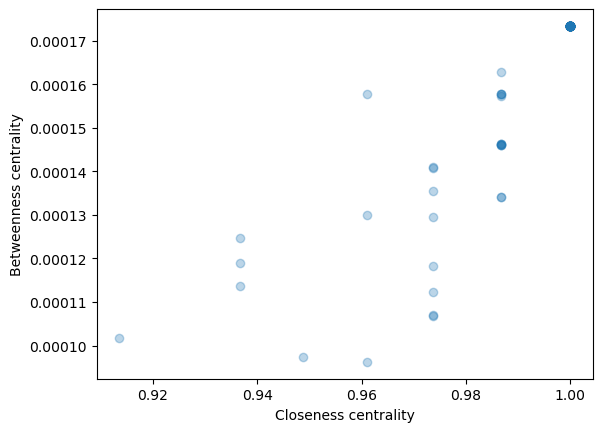

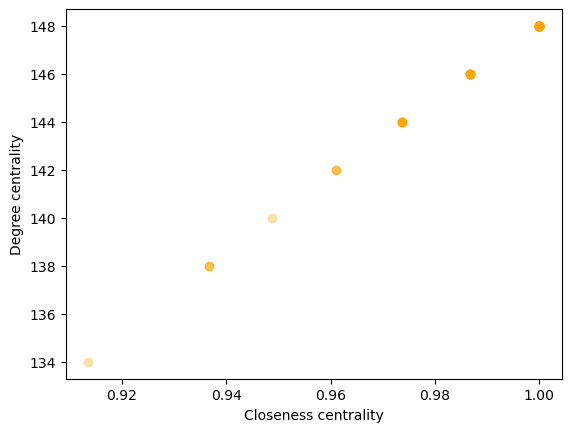

In [97]:
_ = plt.scatter(list(close_cent.values()), list(bet_cent.values()), alpha=0.3)
_ = plt.xlabel("Closeness centrality")
_ = plt.ylabel("Betweenness centrality")

plt.show()

_ = plt.scatter(list(close_cent.values()), list(deg_cent.values()), alpha=0.3, c="orange")
_ = plt.xlabel("Closeness centrality")
_ = plt.ylabel("Degree centrality")

La centralità in teoria delle reti è una misura di importanza di un nodo all'interno di una rete. Esistono diverse metriche di centralità che catturano vari aspetti dell'importanza di un nodo. Le tre principali sono:
Degree Centrality (Centralità di Grado)
Closeness Centrality (Centralità di Prossimità)
Betweenness Centrality (Centralità di Intermediazione)
1. Degree Centrality (Centralità di Grado)
La centralità di grado misura l'importanza di un nodo in base al numero di collegamenti (archi) che ha con altri nodi.
Un nodo con un alto grado di centralità ha molte connessioni dirette con altri nodi e può quindi essere considerato influente o centrale nella rete.
2. Closeness Centrality (Centralità di Prossimità)
La centralità di prossimità misura l'importanza di un nodo in base alla somma delle distanze più corte (cammini minimi) tra quel nodo e tutti gli altri nodi della rete.
Un nodo con un'alta centralità di prossimità può raggiungere rapidamente gli altri nodi nella rete, rendendolo efficiente per la trasmissione di informazioni.
3. Betweenness Centrality (Centralità di Intermediazione)
La centralità di intermediazione misura l'importanza di un nodo in base al numero di volte in cui appare nei cammini minimi tra altri nodi.
Un nodo con un'alta centralità di intermediazione svolge un ruolo di "ponte" all'interno della rete, facilitando il flusso di informazioni tra diverse parti della rete.

In un grafo con alta correlazione tra degree centrality e closeness centrality, i nodi con molte connessioni (alta degree centrality) sono anche quelli che possono raggiungere rapidamente altri nodi nel grafo (alta closeness centrality). Questo suggerisce che avere molti vicini locali contribuisce anche a un accesso più rapido e diretto al resto del grafo.

## Comparazione della rete con modelli nulli
Confrontare la statistiche calcolate sulla rete selezionata con i valori attesi nei
principali modelli nulli visti a lezione (ER, BA). Discutere ed interpretare le
differenze/similarità osservate

## Random graphs (ER)

According to the Erdős–Rényi model, a random graph is constructed by connecting nodes randomly with probability $p$.
We build an Erdős–Rényi model equivalent to the Facebook graph

- equivalence means the same number of nodes, and the same average degree
    - thus, $p = \frac{\langle k \rangle}{N}$

Uno degli approcci standard quando si studia un grafo è quello di confrontarlo con dei grafi estratti.
Un grafo random di tipo ER ha come parametri il numero dei nodi e la prob con cui vengono stabiliti gli edge. In particolare se un grafo ha n nodi tutti gli edge possibili sono n x n-1 / 2. L'idea del grafo ER è quello di attivare questi edge possibili con prob P. Quindi più è alta P più è alto il numero di edge che vengono creati all'interno del grafo. 

Il primo passo è quello di creare un grafo random ER simile al nostro grafo, quindi deve avere lo stesso numero di nodi e di archi più o meno.

In [8]:
G_GC_u = G_GC.to_undirected()

avg_degree = sum(dict(G_GC_u.degree()).values())/G_GC_u.number_of_nodes()
avg_degree

er_p_GC = avg_degree/G_GC_u.number_of_nodes()
er_p_GC

er_G_all = nx.erdos_renyi_graph(G_GC_u.number_of_nodes(), er_p_GC)

# # take only the Giant Component
er_G = er_G_all.subgraph(max(nx.connected_components(er_G_all), key=len))
er_G.number_of_nodes()
G_GC_u.number_of_nodes()

215.18788785704854

0.009470881028874105

22721

22721

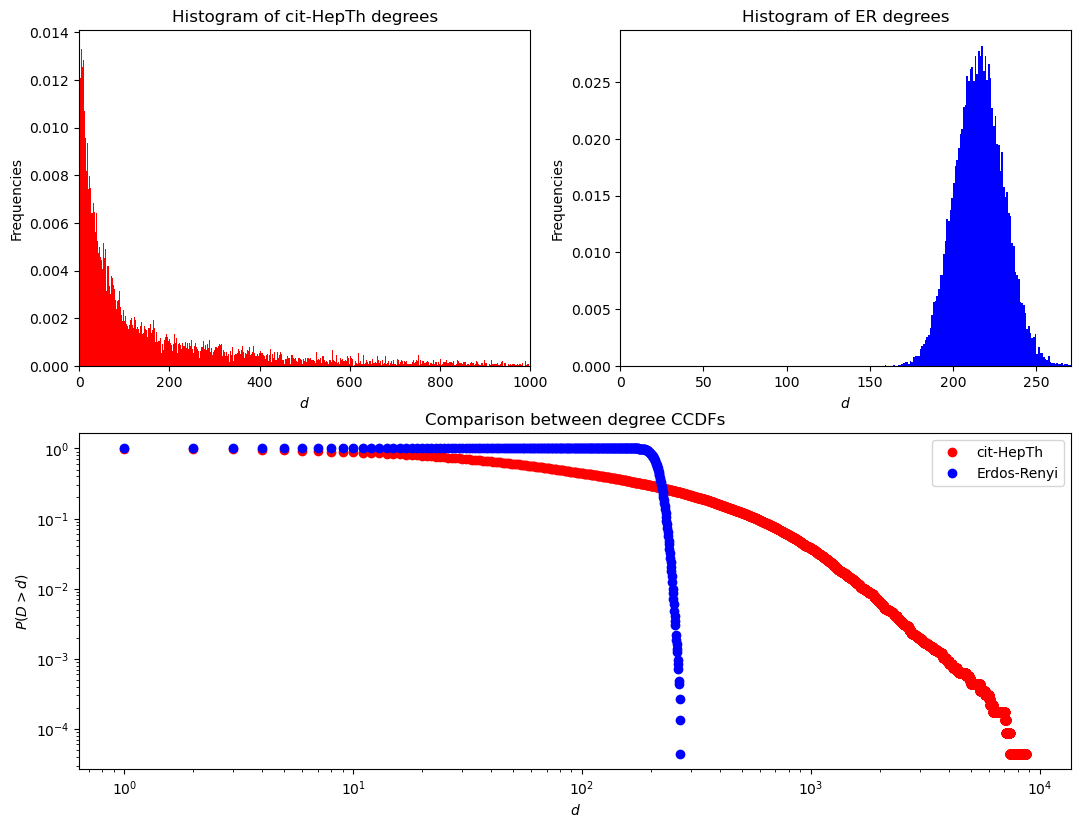

In [21]:
# # we use GridSpecs for a finer control of the plot positioning
fig_sizes = (fig_sizes[0], 2*default_sizes[1])
f = plt.figure(figsize = fig_sizes)

# create a 2x2 Grid Specification
gs = gridspec.GridSpec(2, 2)

# add subplots to the figure, using the GridSpec gs
# position [0,0] (upper-left corner)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
# the third plot spans the entire second row
ax3 = plt.subplot(gs[1,:])

# # compute and plot the histogram of cit-HepTh degrees
d_G = list(dict(G_GC_u.degree()).values())
_,_,_ = ax1.hist(d_G, bins=range(1,max(d_G)+2), density = True, color = 'red')
_ = ax1.set_xlim(0,1000)
#_ = ax1.set_xlim(0, max(d_G) + 1)
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Frequencies")
_ = ax1.set_title("Histogram of cit-HepTh degrees")

# # compute and plot the histogram of ER degrees
d_er = list(dict(er_G.degree()).values())
_,_,_ = ax2.hist(d_er, bins=range(1,max(d_er)+2), density = True, color = 'blue')
#_ = ax2.set_xlim(0,80)
_ = ax2.set_xlim(0, max(d_er) + 1)
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("Frequencies")
_ = ax2.set_title("Histogram of ER degrees")

# compute and plot the degree CCDFs
G_ecdf = ECDF(d_G)
er_ecdf = ECDF(d_er)
x = np.arange(1,max(d_G)+1)
_ = ax3.loglog(x, 1-G_ecdf(x), 'ro', label = 'cit-HepTh')
x = np.arange(1,max(d_er)+1)
_ = ax3.loglog(x, 1-er_ecdf(x), 'bo', label = 'Erdos-Renyi')
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("$P(D>d)$")
_ = ax3.set_title("Comparison between degree CCDFs")
_ = ax3.legend(numpoints = 1)

Un grafo ER è in grado di catturare dalle reti reali soltanto l'effetto small world, quindi soltanto percorsi brevi all'interno del grafo. Su tutto il resto non riesce a catturare le distribuzioni più tipiche delle reti reali. Qua abbiamo che il nostro grafo ha una distribuzione del degree che ha una tendenza power law, mentre nel grafo ER equivalente la distribuzione è quella tipica a campana delle distribuzioni light tailed. Questo si vede benissimo anche dalle CCDF. La coda ER decresce molto velocemente. 

## Assortativity

-5.507105825712172e-05

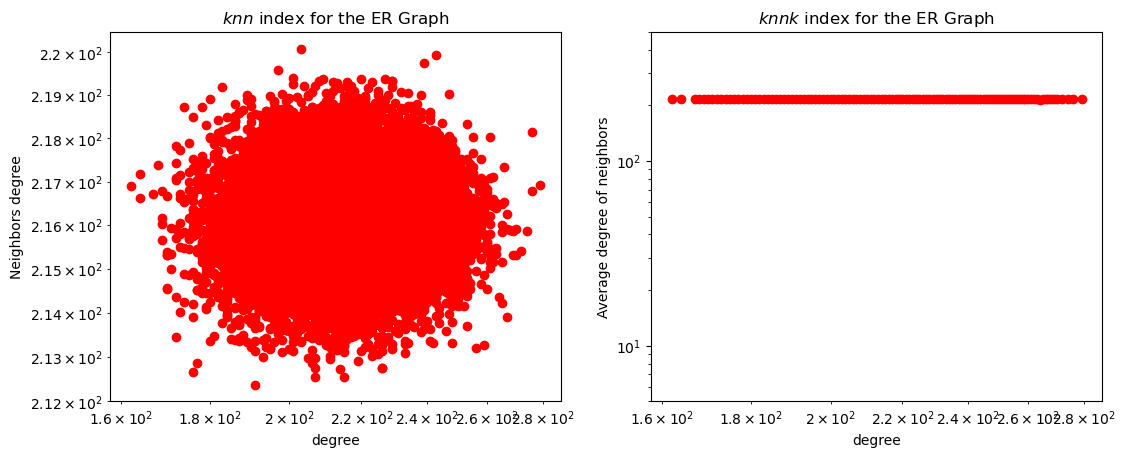

In [121]:
# Equivalent ER graph

# The global assortativity coefficient - we will need the undirected version of the graph from now on
# the two below are two implementations of the same metric (the latter uses scipy)
nx.degree_pearson_correlation_coefficient(er_G)

# The knn analysis 

# average nearest neighbor degree for all vertices (knn)
er_knn = nx.average_neighbor_degree(er_G)
# fb_knn

# average nearest neighbor degree of vertices with same degree value
er_knnk = nx.average_degree_connectivity(er_G)
# er_knnk = dict(sorted(er_knnk.items())) # not needed for plotting, just to get a nicer print

er_deg_list=[x[1] for x in list(er_G.degree())]

_ = fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (2*default_sizes[0], default_sizes[1]))
_ = ax1.loglog(er_deg_list, list(er_knn.values()), 'ro')
_ = ax1.set_xlabel("degree")
_ = ax1.set_ylabel("Neighbors degree")
_ = ax1.set_title("$knn$ index for the ER Graph")

_ = ax2.loglog(list(er_knnk.keys()), list(er_knnk.values()), 'ro')
_ = ax2.set_ylim(5,500)
_ = ax2.set_xlabel("degree")
_ = ax2.set_ylabel("Average degree of neighbors")
_ = ax2.set_title("$knnk$ index for the ER Graph")

## Clustering

In [8]:
nx.transitivity(er_G) # global transitivity (C1)
nx.average_clustering(er_G, count_zeros=True) # average local transitivity (C2)

0.009463860388255443

0.009463584575655944

ER non cattura il clustering coefficient delle reti reali, che tende verso l'alto diciamo così. L'unica cosa che cattura ER è l'effetto small world. Vediamo se è vero. Calcoliamo gli un UNWEIGHTED shortest paths in cui si vanno a contare il numero di hop senza tener conto del peso dei link, i percorsi sono della stessa lunghezza del grafo reale.  

## Shortest Path

In [15]:
# Shortest path lenght
# on a subset of the nodes, as otherwise it will take forever to compute
# generated a sample of 100 vertices as source/destinations
G_vs_src = sample(list(G_GC_u.nodes()), 1000)
G_vs_trg = sample(list(G_GC_u.nodes()), 1000)
er_vs_src = sample(list(er_G.nodes()), 1000)
er_vs_trg = sample(list(er_G.nodes()), 1000)

# computed the UNWEIGHTED shortest paths
G_n_hops_u = [nx.shortest_path_length(G_GC_u, source = G_vs_src[i], target = G_vs_trg[i]) for i in range(1000)]
np.mean(G_n_hops_u)

er_n_hops_u = [nx.shortest_path_length(er_G, source = er_vs_src[i], target = er_vs_trg[i]) for i in range(1000)]
np.mean(er_n_hops_u)

2.724

2.106

## Barabasi-Albert

BA graphs reproduce a power law degree distribution con esponente fisso a 3.

Equivalence:
- Same number of nodes
- `m` = number of edges / number of nodes (ci determina il numero di edges che vengono creati con ciascun nuovo nodo)
Per semplicità facciamo number of edges / number of nodes


In [9]:
G_GC_u = G_GC.to_undirected()

ba_m = G_GC_u.number_of_edges()/G_GC_u.number_of_nodes()
ba_m

ba_G_all = nx.barabasi_albert_graph(G_GC_u.number_of_nodes(), m = int(ba_m))

# # take only the Giant Component
ba_G = ba_G_all.subgraph(max(nx.connected_components(ba_G_all), key=len))

ba_G.number_of_nodes()
G_GC_u.number_of_nodes()

ba_G.number_of_edges()
G_GC_u.number_of_edges()

avg_degree
ba_G.number_of_edges()/ba_G.number_of_nodes()*2

107.59394392852427

22721

22721

2419698

2444642

215.18788785704854

212.99220984991857

- nodi uguali;
- edges quasi uguali;
- l'avg_degree è quasi uguale
siamo soddisfatti

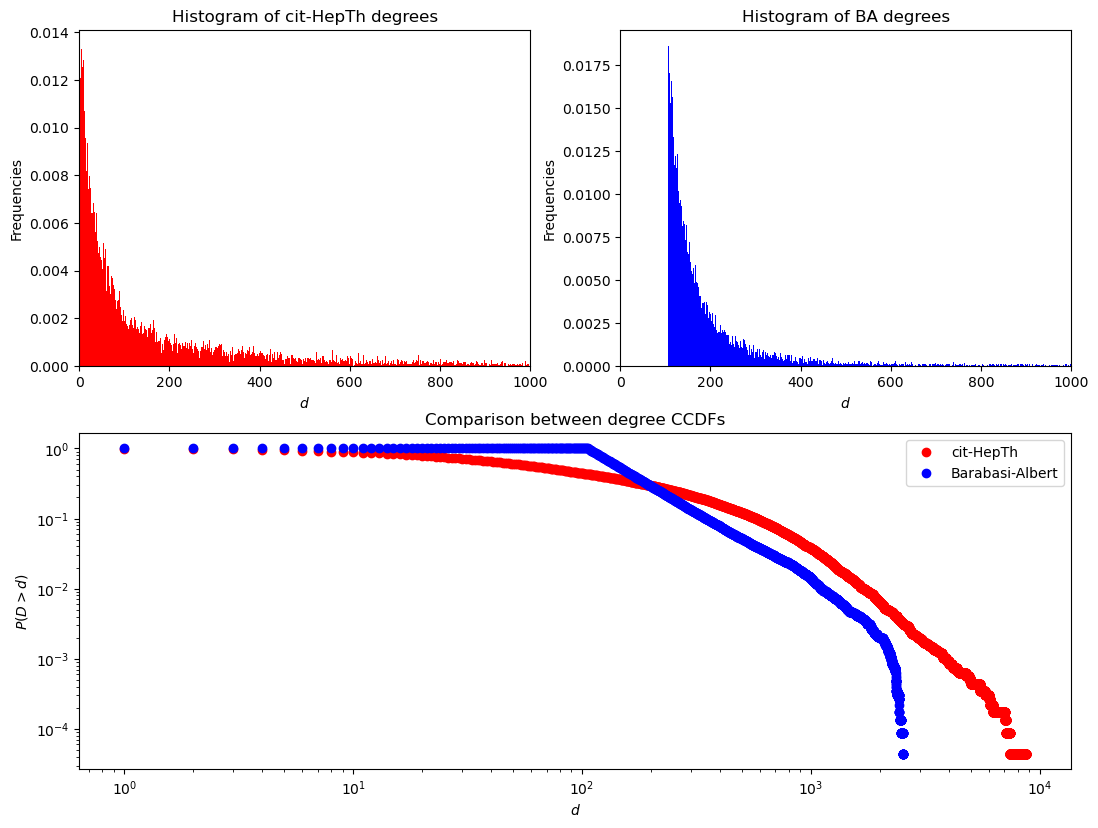

In [23]:
# # we use GridSpecs for a finer control of the plot positioning
fig_sizes = (fig_sizes[0], 2*default_sizes[1])
f = plt.figure(figsize = fig_sizes)

# create a 2x2 Grid Specification
gs = gridspec.GridSpec(2, 2)

# add subplots to the figure, using the GridSpec gs
# position [0,0] (upper-left corner)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
# the third plot spans the entire second row
ax3 = plt.subplot(gs[1,:])

# # compute and plot the histogram of cit-HepTh degrees
d_G = list(dict(G_GC_u.degree()).values())
_,_,_ = ax1.hist(d_G, bins=range(1,max(d_G)+2), density = True, color = 'red')
_ = ax1.set_xlim(0,1000)
_ = ax1.set_xlabel("$d$")
_ = ax1.set_ylabel("Frequencies")
_ = ax1.set_title("Histogram of cit-HepTh degrees")

# # compute and plot the histogram of ER degrees
d_ba = list(dict(ba_G.degree()).values())
_,_,_ = ax2.hist(d_ba, bins=range(1,max(d_ba)+2), density = True, color = 'blue')
_ = ax2.set_xlim(0,1000)
#_ = ax2.set_xlim(0, max(d_ba) + 1)
_ = ax2.set_xlabel("$d$")
_ = ax2.set_ylabel("Frequencies")
_ = ax2.set_title("Histogram of BA degrees")

# compute and plot the degree CCDFs
G_ecdf = ECDF(d_G)
ba_ecdf = ECDF(d_ba)
x = np.arange(1,max(d_G)+1)
_ = ax3.loglog(x, 1-G_ecdf(x), 'ro', label = 'cit-HepTh')
x = np.arange(1,max(d_ba)+1)
_ = ax3.loglog(x, 1-ba_ecdf(x), 'bo', label = 'Barabasi-Albert')
_ = ax3.set_xlabel("$d$")
_ = ax3.set_ylabel("$P(D>d)$")
_ = ax3.set_title("Comparison between degree CCDFs")
_ = ax3.legend(numpoints = 1)

Comportamento dal punto di vista macroscopico molto simili. BA ha una coda più pesante di ER ma meno di cit.

## Assortativity

0.005526667263503718

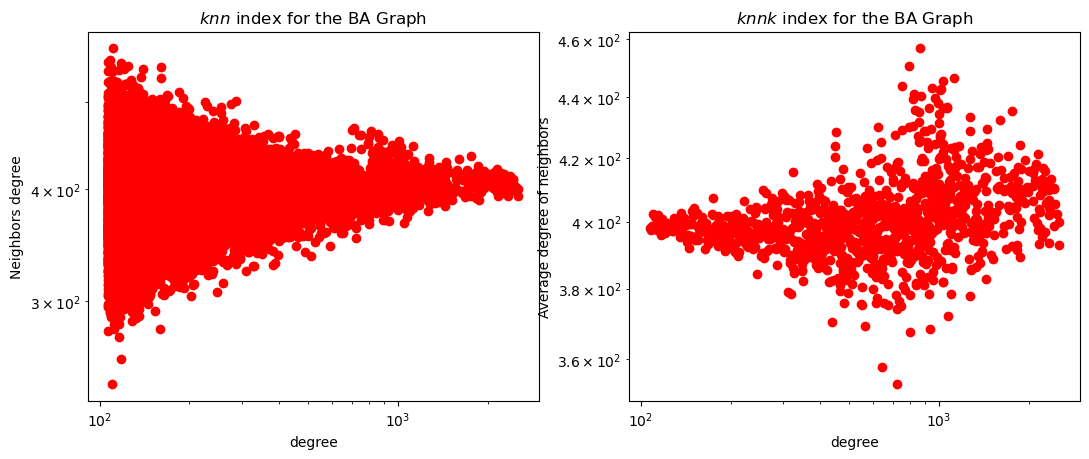

In [26]:
# Equivalent BA graph

# The global assortativity coefficient - we will need the undirected version of the graph from now on
# the two below are two implementations of the same metric (the latter uses scipy)
nx.degree_pearson_correlation_coefficient(ba_G)

# The knn analysis 

# average nearest neighbor degree for all vertices (knn)
ba_knn = nx.average_neighbor_degree(ba_G)
# fb_knn

# average nearest neighbor degree of vertices with same degree value
ba_knnk = nx.average_degree_connectivity(ba_G)
# er_knnk = dict(sorted(er_knnk.items())) # not needed for plotting, just to get a nicer print

ba_deg_list=[x[1] for x in list(ba_G.degree())]

_ = fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (2*default_sizes[0], default_sizes[1]))
_ = ax1.loglog(ba_deg_list, list(ba_knn.values()), 'ro')
_ = ax1.set_xlabel("degree")
_ = ax1.set_ylabel("Neighbors degree")
_ = ax1.set_title("$knn$ index for the BA Graph")

_ = ax2.loglog(list(ba_knnk.keys()), list(ba_knnk.values()), 'ro')
#_ = ax2.set_ylim(5,50)
_ = ax2.set_xlabel("degree")
_ = ax2.set_ylabel("Average degree of neighbors")
_ = ax2.set_title("$knnk$ index for the BA Graph")

C'è un pò più di movimento, ma il grafo di BA dal punto di vista matematico è considerato abbastanza neutro.

## Clustering

In [10]:
nx.transitivity(ba_G) # global transitivity (C1)
nx.average_clustering(ba_G, count_zeros=True) # average local transitivity (C2)

0.03341007808702712

0.032809475409632936

## Shortest path

In [16]:
# Shortest path lenght
# on a subset of the nodes, as otherwise it will take forever to compute
# generated a sample of 100 vertices as source/destinations
G_vs_src = sample(list(G_GC_u.nodes()), 1000)
G_vs_trg = sample(list(G_GC_u.nodes()), 1000)
ba_vs_src = sample(list(ba_G.nodes()), 1000)
ba_vs_trg = sample(list(ba_G.nodes()), 1000)

# computed the UNWEIGHTED shortest paths
G_n_hops_u = [nx.shortest_path_length(G_GC_u, source = G_vs_src[i], target = G_vs_trg[i]) for i in range(1000)]
np.mean(G_n_hops_u)

ba_n_hops_u = [nx.shortest_path_length(ba_G, source = ba_vs_src[i], target = ba_vs_trg[i]) for i in range(1000)]
np.mean(ba_n_hops_u)

2.727

2.097

Ci aspettiamo path piuttosto piccoli. Sappiamo che i path quando ci sono nodi ad alto grado si riducono un pò, però siamo in un range più che accettabile.